# Universidad de Buenos Aires
# Deep Learning - Examen
# Agosto 2023



El examen comienza al momento de recibir este correo y la ventana de entrega estará abierta hasta el domingo 27 de Agosto a las 20:00hs. Toda comunicación con otros alumnos respecto del examen y la resolución de los ejercicios, queda estrictamente prohibida. Los exámenes serán comparados desde el punto de vista de la redacción, de los resultados y del código para determinar que el trabajo fue 100% individual y único. El examen es a libro abierto, pudiendo utilizar los contenidos vistos en clase y otra bibliografía. Todas las soluciones deben ser originales y si se toman ideas de fuentes externas deben ser correctamente citas incluyendo el correspondiente link o página de libro.

El formato de entrega debe ser un “link a un colab” (compartir a las siguientes direcciones: maxit1992@gmail.com y lelectronfou@gmail.com ) o un “link a un notebook en un github público”.

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para la totalidad del examen.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-Examen AGOSTO 2023.ipynb**
- Los códigos deben poder ejecutarse.
- Los resultados, cómo el código y las explicaciones deben quedar guardados y visualizables en el correspondiente link.
- Prestar atención a las consignas, responder las preguntas cuando corresponda.



## Ejercicio 1



Dada la siguiente función:

$$
f(x,y) = (1.5 - x + xy)^2 + (2.25-x+xy^2)^2 + (2.625 -x + xy^3)^2
$$


Encontrar el punto donde la función es mínima y el valor de dicho mínimo:

a. Utilizando SGD y cálculo de gradiente con regla de la cadena.

b. Utilizando SGD y pytorch.

a. Para encontrar el punto donde la función $f(x,y)$ es mínima utilizando el método del descenso de gradiente estocástico (SGD) y el cálculo de gradiente con la regla de la cadena, necesitamos calcular las derivadas parciales de $f(x,y)$ con respecto a $x$ e $y$ y luego actualizar $x$ e $y$ iterativamente utilizando el gradiente y un factor de aprendizaje.

La función que queremos minimizar es:
$$
f(x,y) = (1.5 - x + xy)^2 + (2.25-x+xy^2)^2 + (2.625 -x + xy^3)^2
$$

Paso 1: Calculamos las derivadas parciales de la función con respecto a $x$ e $y$ utilizando la regla de la cadena:

$$
\frac{\partial f}{\partial x} = 2(1.5 - x + xy)(y-1)+2(2.25-x+xy^2)(y^2-1)+2(2.625 -x + xy^3)(y^3-1) =
$$

$$
= (3y-4xy+2xy^2+2x-3)+(4.5y^2-2xy^2+2xy^4-4.5+2x-2xy^2)+(5.25y^3-2xy^3+2xy^6-5.25+2x-2xy^3) =
$$

$$
= 2x(y^6+y^4-2y^3-y^2-2y+3)+5.25y^3+4.5y^2+3y-12.75
$$

$$
\frac{\partial f}{\partial y} = 2(1.5 - x + xy)x+2(2.25-x+xy^2)(2xy)+2(2.625 -x + xy^3)(3xy^2) =
$$

$$
= 2x(1.5 - x + xy)+4xy(2.25-x+xy^2)+6xy^2(2.625 -x + xy^3)
$$

Paso 2: Inicializamos valores para $x$, $y$ y el factor de aprendizaje $\alpha$. A partir de estos valores, iteramos actualizando $x$ e $y$ en función de las derivadas parciales:

$$
x_{t+1} = x_{t} - \alpha \times \frac{\partial f}{\partial x}\bigg|_{x=x_t, y=y_t}
$$

$$
y_{t+1} = y_{t} - \alpha \times \frac{\partial f}{\partial y}\bigg|_{x=x_t, y=y_t}
$$

Repetimos estos pasos hasta que los valores de $x$ e $y$ converjan a un mínimo o se alcance un número máximo de iteraciones.

b. El código a continuación utiliza el tensor x e y de PyTorch para realizar el descenso de gradiente. La función backward() calcula automáticamente los gradientes y el método zero_() se utiliza para restablecer los gradientes en cada iteración.

In [1]:
import torch

# Definir la función
def f(x, y):
    return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

# Inicializar valores de x e y
x = torch.tensor([0.0], requires_grad=True)
y = torch.tensor([0.0], requires_grad=True)

# Tasa de aprendizaje
alpha = 0.01

# Número de iteraciones
num_iterations = 1000

# Descenso de gradiente
for _ in range(num_iterations):
    loss = f(x, y)
    loss.backward()  # Calcular los gradientes
    
    # Actualizar los valores de x e y
    with torch.no_grad():
        x -= alpha * x.grad
        y -= alpha * y.grad
        x.grad.zero_()
        y.grad.zero_()

# Imprimir el resultado
print("Resultado utilizando PyTorch:")
print("Valor mínimo:", loss.item())
print("Coordenadas (x, y):", x.item(), y.item())

Resultado utilizando PyTorch:
Valor mínimo: 5.6234504882013425e-05
Coordenadas (x, y): 2.9815101623535156 0.49534761905670166


## Ejercicio 2

Si tiene una imagen a procesar de 1024x720x3 y desea aplicar en cascada, 2 capas de convolución, seguido por una capa de activación y una de pooling,  con las siguientes características:

*Conv1:*
* tamaño kernel = 7x7
* padding = 2
* stride = 1
* número de kernel = 16

*Conv2:*
* tamaño kernel = 5x5
* padding = 0
* stride = 1
* número de kernel = 32

*activación*
* Tanh()

*pooling*
* tamaño pooling = 5x5
* padding pooling = 0
* stride pooling = 5

a) ¿Cual es el tamaño final de la salida y cuantos canales tiene?

b) Si tiene que conectar esa salida a una `fully_connected` para clasificar 3 clases ¿que tamaño debe tener?

a) Para calcular el tamaño y el número de canales de la salida después de aplicar las capas de convolución, activación y pooling en cascada, podemos seguir estos pasos: 

Capa Conv1: El tamaño de salida después de esta capa se calcula utilizando la fórmula:

$$
Tamaño\ de\ salida = \frac{Tamaño\ entrada + 2 \times Padding - Tamaño\ kernel}{Stride} +1
$$

Dado el tamaño de entrada $1024 \times 720 \times 3$ (ancho x alto x canales) y los datos proporcionados en el enunciado, se calcula el tamaño salida después de Conv1:

$$
Ancho = \frac{1024 + 2 * 2 - 7}{1} +1 =1022
$$

$$
Alto = \frac{720 + 2 * 2 - 7}{1} +1 = 718
$$

$$
Tamaño\ de\ salida = 1022 \times 718 \times 16
$$

Capa Conv2: Dado el tamaño de entrada (salida de Conv1) $1022 \times 718 \times 16$ y los datos proporcionados en el enunciado, se calcula el tamaño salida después de Conv2:

$$
Ancho = \frac{1022 + 2 * 0 - 5}{1} +1 = 1018
$$

$$
Alto = \frac{718 + 2 * 0 - 5}{1} +1 = 714
$$

$$
Tamaño\ de\ salida = 1018 \times 714 \times 32
$$​

Capa de activación: La función de activación Tanh() no afecta las dimensiones ni el número de canales, ya que la función de activación se aplica elemento por elemento en cada canal.

Capa de pooling: Dado el tamaño de entrada (salida de Conv2) $1018 \times 714 \times 32$ y los datos proporcionados en el enunciado, se calcula el tamaño salida después del pooling:

$$
Ancho = \frac{1018 + 2 * 0 - 5}{5} +1 = 203
$$

$$
Alto = \frac{714 + 2 * 0 - 5}{5} +1 = 142
$$

$$
Tamaño\ de\ salida = 203 \times 142 \times 32
$$

Después de aplicar las 2 capas de convolución, la activación (Tanh) y el pooling, el tamaño final de la salida es $203 \times 142 \times 32$.

El código presentado a continuación confirma estos resultados.

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        
        # Capas de convolución
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=7, padding=2, stride=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, padding=0, stride=1)
        
        # Capa de activación
        self.activation = nn.Tanh()
        
        # Capa de pooling
        self.pooling = nn.MaxPool2d(kernel_size=5, padding=0, stride=5)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.activation(x)
        x = self.conv2(x)
        x = self.activation(x)
        x = self.pooling(x)
        return x

# Crear una instancia de la red
model = CustomCNN()

# Crear una imagen de ejemplo (ten en cuenta que aquí el tamaño es 3x1024x720 en lugar de 1024x720x3)
input_image = torch.rand(1, 3, 1024, 720)

# Pasar la imagen a través de la red
output = model(input_image)

# Imprimir la forma del tensor de salida
output_shape = output.shape
print("Tamaño de la salida del modelo:", output_shape)

Tamaño de la salida del modelo: torch.Size([1, 32, 203, 142])


b) Después de todas las operaciones anteriores, la salida tiene un tamaño de $203 \times 142 \times 32$. Para conectar esta salida a una capa totalmente conectada (fully connected), primero debemos aplanarla en un vector unidimensional. El tamaño del vector será el producto del tamaño de las dimensiones espaciales y el número de canales:
$$
Tamaño\ del\ vector = 203 \times 142 \times 32 = 922432
$$
Por lo tanto, el tamaño de entrada de la fully connected debe ser 922432 para conectarlo correctamente a la fully connected que realizará la clasificación en 3 clases. Esto garantiza que cada elemento en la salida se conecte con una neurona en la capa fully connected, lo que permite que la red neuronal aprenda patrones y características para la clasificación.

El código presentado a continuación confirma los resultados.

In [3]:
# Definir la clase FullyConnectedClassifier 
class FullyConnectedClassifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(FullyConnectedClassifier, self).__init__()
        
        self.fc = nn.Linear(input_size, num_classes)
    
    def forward(self, x):
        x = self.fc(x)
        return x

# Tamaño necesario para la capa fully connected
input_fc_size = output_shape[1] * output_shape[2] * output_shape[3]

# Crear una instancia del modelo FullyConnectedClassifier
classifier_model = FullyConnectedClassifier(input_fc_size, num_classes=3)

# Pasar la salida del modelo CustomCNN a través del modelo FullyConnectedClassifier
classification_output = classifier_model(output.view(-1, input_fc_size))

# Imprimir la forma del tensor de salida de la clasificación
print("Tamaño necesario para la capa fully connected:", input_fc_size)
print("Forma de la salida de la clasificación:", classification_output.shape)

Tamaño necesario para la capa fully connected: 922432
Forma de la salida de la clasificación: torch.Size([1, 3])


## Ejercicio 3




Para la siguiente red neuronal recurrente, se pide expresar las ecuaciones "*unfolded*" de la salida de la misma y de sus estados ocultos, si el vector de entrada son 3 muestras secuenciadas de la variable $x(t)$.

![b](https://drive.google.com/uc?export=view&id=1Fz46GTK7Oy_w5OEgwLCLfHFMr7b6-AnL)




Ecuaciones de la RNN:

$$ \hat{y}(t) = w_{h1y} * h1(t) + w_{h2y} * h2(t) + by$$

$$ h1(t) = w_{xh1} * x(t) + w_{h1h1} * h1(t-1) + w_{h2h1} * h2(t-1)+ bh1$$
$$ h2(t) = w_{xh2} * x(t) + w_{h2h2} * h2(t-1) + w_{h1h2} * h1(t-1)+ bh2 $$

Para expresar las ecuaciones "unfolded" de la salida y los estados ocultos de la red neuronal recurrente (RNN) cuando se le proporcionan 3 muestras secuenciadas de la variable $x(t)$, podemos seguir el flujo de la red en cada paso de tiempo. Primero, inicializamos los estados ocultos $h1$ y $h2$ en $t=0$ con algún valor apropiado $h1(t_0)$ y $h2(t_0)$. Asumiendo que las muestras secuenciales son $x(t_1)$, $x(t_2)$ y $x(t_3)$, las ecuaciones "unfolded" para la salida y los estados ocultos de la RNN serían las siguientes:

Paso 1: $t=t_1$ 

Estados ocultos:

$$ 
h1(t_1) = w_{xh1} * x(t_1) + w_{h1h1} * h1(t_0) + w_{h2h1} * h2(t_0)+ bh1
$$
$$ 
h2(t_1) = w_{xh2} * x(t_1) + w_{h2h2} * h2(t_0) + w_{h1h2} * h1(t_0)+ bh2
$$

Salida:
$$ 
\hat{y}(t_1) = w_{h1y} * h1(t_1) + w_{h2y} * h2(t_1) + by
$$

Paso 2: $t=t_2$ 

Estados ocultos:
$$ 
h1(t_2) = w_{xh1} * x(t_2) + w_{h1h1} * h1(t_1) + w_{h2h1} * h2(t_1)+ bh1
$$
$$ 
h2(t_2) = w_{xh2} * x(t_2) + w_{h2h2} * h2(t_1) + w_{h1h2} * h1(t_1)+ bh2
$$

Salida:
$$ 
\hat{y}(t_2) = w_{h1y} * h1(t_2) + w_{h2y} * h2(t_2) + by
$$

Paso 3: $t=t_3$ 

Estados ocultos:
$$ 
h1(t_3) = w_{xh1} * x(t_3) + w_{h1h1} * h1(t_2) + w_{h2h1} * h2(t_2)+ bh1
$$
$$ 
h2(t_3) = w_{xh2} * x(t_3) + w_{h2h2} * h2(t_2) + w_{h1h2} * h1(t_2)+ bh2
$$

Salida:
$$ 
\hat{y}(t_3) = w_{h1y} * h1(t_3) + w_{h2y} * h2(t_3) + by
$$

En cada paso, las ecuaciones indican cómo se calcula la salida $\hat{y}$ y los estados ocultos $h1$ y $h2$ basados en las muestras secuenciales $x(t)$ y los estados ocultos anteriores $h1$ y $h2$. El subíndice en $h1(t)$ y $h2(t)$ representa el paso de tiempo $t$ y $h1(t_0)$ y $h2(t_0)$ representan los estados ocultos iniciales.

## Ejercicio 4

Descargar el dataset del siguiente link: https://drive.google.com/file/d/1X8_G5BpQMi-Nnbtms2RL8lcWSxzD8ixd/view?usp=sharing. El dataset son compras de productos que diferentes clientes realizaron durante un black sales. El dataset contiene información sobre las transacciones y el objetivo es poder utilizar el dataset para crear diferentes modelos que puedan predecir cuánto un cliente está dispuesto a gastar en un producto en el futuro. Particularmente, vamos a tratar este problema como una clasificación binaria donde queremos averiguar si el cliente va a gastar mucha plata (más de 9000) o poca plata (menos de 9000).

a) Entrenar un modelo de deep learning que no utilice embeddings y que no emplee el `user_id` ni el `product_id`.

In [2]:
# Librerias
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
import torch
import torch.nn as nn
import torch.optim as optim
from keras.layers import Embedding, Input, Dense, Concatenate, Flatten
from keras.models import Model
from keras.optimizers import Adam
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [3]:
# Cargar y preparar los datos 
df = pd.read_csv("dataset_black_sales.csv")

# Obtener los nombres de las columnas categóricas
cat_cols = df.select_dtypes(include='object').columns
print("Variables categóricas en el dataset:")
for col in cat_cols:
    print(col)
print()

# Obtener los nombres de las columnas numéricas
num_cols = df.select_dtypes(include='number').columns
print("Variables numéricas en el dataset:")
for col in num_cols:
    print(col)
print()

# Mostrar la cantidad de valores únicos para las vars categóricas
print("Cantidad de valores únicos en las variables categóricas:")
for col in cat_cols:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count}")

Variables categóricas en el dataset:
Product_ID
Gender
Age
City_Category
Stay_In_Current_City_Years

Variables numéricas en el dataset:
User_ID
Occupation
Marital_Status
Product_Category_1
Product_Category_2
Product_Category_3
Purchase

Cantidad de valores únicos en las variables categóricas:
Product_ID: 3631
Gender: 2
Age: 7
City_Category: 3
Stay_In_Current_City_Years: 5


Se va a aplicar One-Hot Encoding a las variables 'Gender' y 'City_Category' ya que no son variables ordinales y dada la baja cantidad de valores únicos.
Por otro lado, para las variables 'Age' y 'Stay_In_Current_City_Years', se va a aplicar Label Encoding, ya que existe un orden intrínseco en las categorías.

In [4]:
# Aplicar One-Hot Encoding a 'Gender' y 'City_Category'
df_encoded = pd.get_dummies(df, columns=['Gender', 'City_Category'])

# Aplicar Label Encoding a 'Age' y 'Stay_In_Current_City_Years'
label_encoder = LabelEncoder()
df_encoded['Age'] = label_encoder.fit_transform(df['Age'])
df_encoded['Stay_In_Current_City_Years'] = label_encoder.fit_transform(df['Stay_In_Current_City_Years'])

In [5]:
# Verificar valores faltantes en cada columna y sumarlos
missing_values = df_encoded.isna().sum()

# Imprimir los resultados
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
User_ID                            0
Product_ID                         0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
Gender_F                           0
Gender_M                           0
City_Category_A                    0
City_Category_B                    0
City_Category_C                    0
dtype: int64


In [6]:
# Reemplazar los valores faltantes en Product_Category_2 y Product_Category_3 con una categoría especial
df_encoded['Product_Category_2'].fillna(-1, inplace=True)  # -1 representa "ninguna compra"
df_encoded['Product_Category_3'].fillna(-1, inplace=True)  # -1 representa "ninguna compra"

# Mostrar la cantidad de valores únicos para las vars numéricas
print("Cantidad de valores únicos en las variables numéricas:")
for col in num_cols:
    unique_count = df_encoded[col].nunique()
    print(f"{col}: {unique_count}")

Cantidad de valores únicos en las variables numéricas:
User_ID: 5891
Occupation: 21
Marital_Status: 2
Product_Category_1: 20
Product_Category_2: 18
Product_Category_3: 16
Purchase: 18105


In [7]:
# Verificar valores faltantes en cada columna y sumarlos
missing_values = df_encoded.isna().sum()

# Imprimir los resultados
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
User_ID                       0
Product_ID                    0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
Gender_F                      0
Gender_M                      0
City_Category_A               0
City_Category_B               0
City_Category_C               0
dtype: int64


Implementación en Keras:

In [33]:
# Dividir los datos en características (X) y etiquetas (y)
X = df_encoded.drop(columns=['Purchase','User_ID','Product_ID'])  # Características
y = (df_encoded['Purchase'] > 9000).astype(int)  # Etiquetas (1 si gasto > 9000, 0 en caso contrario)

# Escalado de características
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el conjunto de datos en entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

y_train = np.array(y_train, dtype=np.float32)
y_val = np.array(y_val, dtype=np.float32)

# Construcción del modelo
model_a = keras.Sequential([layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')])

# Compilación del modelo
model_a.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_a = model_a.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model_a.evaluate(X_test, y_test)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")

Epoch 1/10
13752/13752 [==============================] - 20s 1ms/step - loss: 0.4306 - accuracy: 0.8049 - val_loss: 0.3692 - val_accuracy: 0.8430
Epoch 2/10
13752/13752 [==============================] - 18s 1ms/step - loss: 0.3534 - accuracy: 0.8493 - val_loss: 0.3447 - val_accuracy: 0.8550
Epoch 3/10
13752/13752 [==============================] - 18s 1ms/step - loss: 0.3365 - accuracy: 0.8571 - val_loss: 0.3355 - val_accuracy: 0.8513
Epoch 4/10
13752/13752 [==============================] - 18s 1ms/step - loss: 0.3273 - accuracy: 0.8616 - val_loss: 0.3313 - val_accuracy: 0.8614
Epoch 5/10
13752/13752 [==============================] - 18s 1ms/step - loss: 0.3238 - accuracy: 0.8630 - val_loss: 0.3240 - val_accuracy: 0.8634
Epoch 6/10
13752/13752 [==============================] - 18s 1ms/step - loss: 0.3223 - accuracy: 0.8633 - val_loss: 0.3261 - val_accuracy: 0.8608
Epoch 7/10
13752/13752 [==============================] - 18s 1ms/step - loss: 0.3212 - accuracy: 0.8638 - val_loss: 0

Implementación en PyTorch:

In [31]:
# Dividir los datos en características (X) y etiquetas (y)
X = df_encoded.drop(columns=['Purchase','User_ID','Product_ID'])  # Características
y = (df_encoded['Purchase'] > 9000).astype(int)  # Etiquetas (1 si gasto > 9000, 0 en caso contrario)

# Escalado de características
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el conjunto de datos en entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convertir los datos a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_train, dtype=torch.float32)
y_val_tensor = torch.tensor(y_train, dtype=torch.float32)

# Convertir y_test a un arreglo NumPy si es una Series
if isinstance(y_test, pd.Series):
    y_test = y_test.values
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Crear conjuntos de datos tensorizados
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

# Crear DataLoaders para el conjunto de entrenamiento y prueba
batch_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)

# Definir la arquitectura del modelo
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

input_size = X_train.shape[1]
model = NeuralNetwork(input_size)

# Definir la función de pérdida y el optimizador
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Mover el modelo a GPU si está disponible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)
model.to(device)

# Entrenamiento del modelo
epochs = 10
losses_train = []
accuracies_train = [] 
val_losses = [] 
val_accuracies = [] 
test_losses = []
test_accuracies = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0  # Inicializar la pérdida de la época actual
    correct = 0
    total = 0
    
    for batch_X, batch_y in train_loader:
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device)

        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y.view(-1, 1))
        loss.backward() # Backpropagation
        optimizer.step() 

        epoch_loss += loss.item()  # Acumular la pérdida del lote actual
        
        predicted = (outputs >= 0.5).float()
        correct += (predicted == batch_y.view_as(predicted)).sum().item()
        total += batch_y.size(0)
    
    epoch_loss /= len(train_loader)  # Calcular el promedio de pérdida de la época
    accuracy = correct / total
    losses_train.append(epoch_loss)  # Registrar la pérdida en la lista de pérdidas
    accuracies_train.append(accuracy)  # Registrar la precisión en la lista de precisión

    # Validation loop
    model.eval()
    val_epoch_loss = 0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():
        for batch_X_val, batch_y_val in val_loader:
            batch_X_val = batch_X_val.to(device)
            batch_y_val = batch_y_val.to(device)
            
            val_outputs = model(batch_X_val)
            val_loss = criterion(val_outputs, batch_y_val.view(-1, 1))
            val_epoch_loss += val_loss.item()

            val_predicted = (val_outputs >= 0.5).float()
            val_correct += (val_predicted == batch_y_val.view_as(val_predicted)).sum().item()
            val_total += batch_y_val.size(0)

    val_epoch_loss /= len(val_loader)
    val_accuracy = val_correct / val_total
    val_losses.append(val_epoch_loss)
    val_accuracies.append(val_accuracy)
    
    # Evaluación del modelo en el conjunto de prueba
    model.eval()  
    correct = 0
    total = 0
    test_loss = 0

    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            batch_X = batch_X.to(device)
            batch_y = batch_y.to(device)

            test_outputs = model(batch_X)
            y_batch_hat = torch.sigmoid(test_outputs)
            
            loss = criterion(test_outputs, batch_y.view(-1, 1))
            test_loss += loss.item()

            predicted = (test_outputs >= 0.5).float()
            correct += (predicted == batch_y.view_as(predicted)).sum().item()
            total += batch_y.size(0)

    test_loss /= len(test_loader)
    test_accuracy = correct / total
            
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f" Epoch {epoch+1} | " \
        f"Train/Valid loss: {epoch_loss:.3f} / {val_epoch_loss:.3f} | " \
        f"Train/Valid accuracy: {accuracy:.3f} / {val_accuracy:.3f} | " \
        f"Test loss: {test_loss:.3f} | Test accuracy: {test_accuracy:.3f}")

 Epoch 1 | Train/Valid loss: 0.439 / 0.383 | Train/Valid accuracy: 0.801 / 0.842 | Test loss: 0.385 | Test accuracy: 0.840
 Epoch 2 | Train/Valid loss: 0.366 / 0.353 | Train/Valid accuracy: 0.840 / 0.847 | Test loss: 0.355 | Test accuracy: 0.845
 Epoch 3 | Train/Valid loss: 0.352 / 0.346 | Train/Valid accuracy: 0.849 / 0.850 | Test loss: 0.348 | Test accuracy: 0.849
 Epoch 4 | Train/Valid loss: 0.347 / 0.347 | Train/Valid accuracy: 0.852 / 0.851 | Test loss: 0.350 | Test accuracy: 0.848
 Epoch 5 | Train/Valid loss: 0.344 / 0.340 | Train/Valid accuracy: 0.853 / 0.852 | Test loss: 0.343 | Test accuracy: 0.851
 Epoch 6 | Train/Valid loss: 0.340 / 0.335 | Train/Valid accuracy: 0.854 / 0.855 | Test loss: 0.337 | Test accuracy: 0.854
 Epoch 7 | Train/Valid loss: 0.338 / 0.339 | Train/Valid accuracy: 0.855 / 0.855 | Test loss: 0.342 | Test accuracy: 0.853
 Epoch 8 | Train/Valid loss: 0.336 / 0.333 | Train/Valid accuracy: 0.856 / 0.854 | Test loss: 0.336 | Test accuracy: 0.852
 Epoch 9 | Train

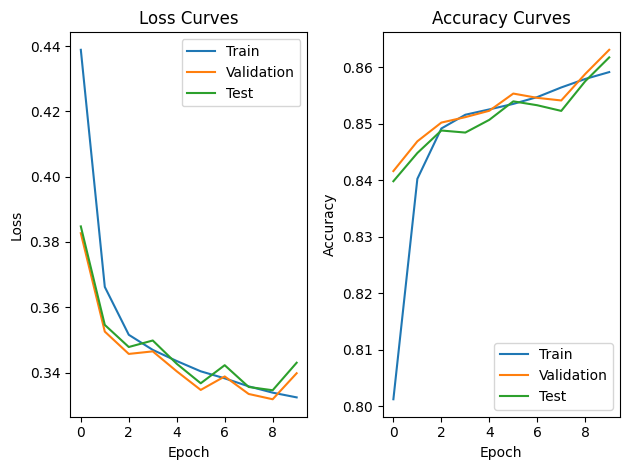

In [32]:

# Plotting Loss Curves
plt.subplot(1, 2, 1)
plt.plot(losses_train, label='Train')
plt.plot(val_losses, label='Validation')
plt.plot(test_losses, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()

# Plotting Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(accuracies_train, label='Train')
plt.plot(val_accuracies, label='Validation')
plt.plot(test_accuracies, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')
plt.legend()

plt.tight_layout()
plt.show()

In [30]:
val_accuracies

[0.8197539392892691,
 0.852990769314675,
 0.8541838047148759,
 0.8583855617719643,
 0.8591127452539915,
 0.8639621500997605,
 0.8606875519822568,
 0.863741722606771,
 0.8618578628986443,
 0.8630213564698878]

b)	Entrenar un modelo de deep learning que utilice embeddings tanto para los productos como los usuarios. Realizar el mapeo de identificador de producto y usuarios a indices antes de separar el dataset en training, validation y testing.

In [112]:
# Transformo 'User_ID' y 'Product_ID' a indices (idx) consecutivos para utilizar embeddings
user_id_to_idx = {value:i for i,value in enumerate(df['User_ID'].unique())}
prod_id_to_idx = {value:i for i,value in enumerate(df['Product_ID'].unique())}

# Vectores de user_idx y prod_idx en el dataset
user_idx = np.array([user_id_to_idx[value] for value in df['User_ID']])
prod_idx = np.array([prod_id_to_idx[value] for value in df['Product_ID']])

# Dividir los datos en características (X) y etiquetas (y)
X = df_encoded.drop(columns=['Purchase','User_ID','Product_ID'])  # Características
y = (df_encoded['Purchase'] > 9000).astype(int)  # Etiquetas (1 si gasto > 9000, 0 en caso contrario)

# Escalado de características
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Divido el dataset
idx = np.random.permutation(X_scaled.shape[0])
train_idx = idx[0:int(0.85*len(idx))]
valid_idx = idx[int(0.85*len(idx)):]

train_x = X_scaled[train_idx]
train_y = y[train_idx]
valid_x = X_scaled[valid_idx]
valid_y = y[valid_idx]

# Divido los vectores user_idx y prod_idx en entrenamiento y validación
user_idx_train = user_idx[train_idx]
user_idx_valid = user_idx[valid_idx]
prod_idx_train = prod_idx[train_idx]
prod_idx_valid = prod_idx[valid_idx]

# Clase Dataset de Pytorch con embeddings
class MyDatasetWithEmbddings(Dataset):
    def __init__(self, x, user_idx, prod_idx, y):
        self.x = x
        self.user_idx = user_idx
        self.prod_idx = prod_idx
        self.y = y

    def __len__(self):
        return self.x.shape[0]

    def __getitem__(self, idx):
        return self.x[idx], self.user_idx[idx], self.prod_idx[idx], self.y[idx]

train_ds_embeddings = MyDatasetWithEmbddings(train_x, user_idx_train, prod_idx_train, train_y)
valid_ds_embeddings = MyDatasetWithEmbddings(valid_x, user_idx_valid, prod_idx_valid, valid_y)

train_dataloader_emb = DataLoader(train_ds_embeddings, batch_size =64, shuffle= True)
valid_dataloader_emb = DataLoader(valid_ds_embeddings, batch_size=64)

# Arquitectura
class NNet(torch.nn.Module):

  def __init__(self):
    # Defino la arquitectura de la red
    super().__init__()
    self.linear_1 = torch.nn.Linear(in_features=13, out_features=200, bias=True)
    self.relu_1 = torch.nn.ReLU()
    self.linear_2 = torch.nn.Linear(in_features = 200, out_features=100, bias=True)
    self.relu_2 = torch.nn.ReLU()
    self.output = torch.nn.Linear(in_features = 100, out_features= 1, bias=True)

  def forward(self, x):
    # Defino el cálculo del paso forward
    x = self.linear_1(x)
    x = self.relu_1(x)
    x = self.linear_2(x)
    x = self.relu_2(x)
    x = self.output(x)
    return x

# Instanciamos la red
nnet = NNet()

# Función de pérdida y optimizador
loss_function = torch.nn.BCEWithLogitsLoss(reduction='sum')
optimizer = torch.optim.Adam(nnet.parameters(), lr=0.01)
     
device = "cpu"
if torch.cuda.is_available():
  device = "cuda:0"

# Copio la red neuronal al dispositivo donde entrene la red neuronal
nnet = nnet.to(device)

In [115]:
# Algoritmo Mini-batch

# cantidad de epochs
epochs = 100

train_loss_by_epoch=[]
valid_loss_by_epoch=[]

# Doble loop algoritmo Mini-Batch
for epoch in range(epochs):
  
  ############################################
  ## Entrenamiento
  ############################################
  nnet.train(True)

  epoch_loss = 0
  epoch_y_hat = []
  epoch_y = []
  
  for i,data in enumerate(train_loader):
    # Obtengo los datos del batch de entrenamiento
    x_batch, y_batch = data
    # Copio el batch al dispositivo donde entreno la red neuronal
    x_batch = x_batch.to(device).float()
    y_batch = y_batch.to(device).float().reshape(-1, 1)

    # Paso forward
    # Limpio optimizer para empezar un nuevo cálculo de gradiente
    optimizer.zero_grad()
    nnet_output = nnet(x_batch)
    y_batch_hat = torch.sigmoid(nnet_output)
    
    # Calculo el loss
    loss = loss_function(nnet_output, y_batch)

    # Backpropagation
    loss.backward()

    # Actualizar los parámetros
    optimizer.step()

    # Almaceno los valores reales y mis predicciones para cálcular las métricas
    epoch_y += list(y_batch.detach().cpu().numpy())
    epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
    # Acumulo la loss del batch
    epoch_loss = epoch_loss + loss.item()

  # Calculo la media de la loss
  epoch_loss = epoch_loss / n_train
  # Almaceno la loss de la epoch para graficar
  train_loss_by_epoch.append(epoch_loss)
  # Cálculo la métrica de la epoch
  accuracy = metrics.accuracy_score(epoch_y, [j>=0.5 for j in epoch_y_hat])

  ############################################
  ## Validación
  ############################################
  # Desactivo el cálculo de gradiente para validación
  nnet.train(False)

  valid_epoch_loss = 0
  valid_epoch_y_hat = []
  valid_epoch_y = []

  for i,data in enumerate(valid_dataloader):
    # Obtengo los datos del batch de validación
    x_batch, y_batch = data
    # Copio el batch al dispositivo donde entreno la red neuronal
    x_batch = x_batch.to(device).float()
    y_batch = y_batch.to(device).float().reshape(-1, 1)

    # Paso forward
    nnet_output = nnet(x_batch)
    y_batch_hat = torch.sigmoid(nnet_output)
    
    # Calculo el loss
    loss = loss_function(nnet_output, y_batch)

    # En validación no hago backpropagation!!

    # Almaceno los valores reales y mis predicciones para cálcular las métricas
    valid_epoch_y += list(y_batch.detach().cpu().numpy())
    valid_epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
    # Acumulo la loss del batch
    valid_epoch_loss = valid_epoch_loss + loss.item()

  # Calculo la media de la loss
  valid_epoch_loss = valid_epoch_loss / n_valid
  # Almaceno la loss de la epoch para graficar
  valid_loss_by_epoch.append(valid_epoch_loss)
  # Cálculo la métrica de la epoch
  valid_accuracy = metrics.accuracy_score(valid_epoch_y, [j>=0.5 for j in valid_epoch_y_hat])

  ############################################
  ## Impresión de resultados por epoch
  ############################################
  print(f" Epoch {epoch} | " \
        f"Train/Valid loss: {epoch_loss:.3f} / {valid_epoch_loss:.3f} | " \
        f"Train/Valid accuracy: {accuracy:.3f} / {valid_accuracy:.3f}")

RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x14 and 13x200)

In [10]:
# Mapeo de identificadores a índices para usuarios y productos
user_ids = df['User_ID'].unique()
user_id_to_index = {user_id: index for index, user_id in enumerate(user_ids)}

product_ids = df['Product_ID'].unique()
product_id_to_index = {product_id: index for index, product_id in enumerate(product_ids)}

df['User_Index'] = df['User_ID'].map(user_id_to_index)
df['Product_Index'] = df['Product_ID'].map(product_id_to_index)

# Dividir los datos en características (X) y etiquetas (y)
X = df_encoded.drop(columns=['Purchase', 'User_ID', 'Product_ID'])
y = (df_encoded['Purchase'] > 9000).astype(int)

# Escalado de características
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el conjunto de datos en entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Dividir los vectores de índices
user_idx = df['User_Index'].to_numpy()
product_idx = df['Product_Index'].to_numpy()

# Dividir los índices en conjuntos de entrenamiento, validación y prueba
user_idx_train, user_idx_temp = train_test_split(user_idx, test_size=0.2, random_state=42)
user_idx_validation, user_idx_test = train_test_split(user_idx_temp, test_size=0.5, random_state=42)

product_idx_train, product_idx_temp = train_test_split(product_idx, test_size=0.2, random_state=42)
product_idx_validation, product_idx_test = train_test_split(product_idx_temp, test_size=0.5, random_state=42)

# Convertir a arreglos de NumPy
user_idx_train = np.array(user_idx_train)
user_idx_validation = np.array(user_idx_validation)
user_idx_test = np.array(user_idx_test)

product_idx_train = np.array(product_idx_train)
product_idx_validation = np.array(product_idx_validation)
product_idx_test = np.array(product_idx_test)

y_train = np.array(y_train, dtype=np.float32)
y_val = np.array(y_val, dtype=np.float32)

# Tamaño de embeddings
embedding_size = 32

# Construcción del modelo con embeddings
user_input = keras.Input(shape=(1,))
product_input = keras.Input(shape=(1,))

user_embedding = layers.Embedding(input_dim=len(user_ids), output_dim=embedding_size)(user_input)
user_embedding = layers.Reshape(target_shape=(embedding_size,))(user_embedding)

product_embedding = layers.Embedding(input_dim=len(product_ids), output_dim=embedding_size)(product_input)
product_embedding = layers.Reshape(target_shape=(embedding_size,))(product_embedding)

concatenated = layers.Concatenate()([user_embedding, product_embedding])

x = layers.Dense(64, activation='relu')(concatenated)
x = layers.Dense(32, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)

model_b = keras.Model(inputs=[user_input, product_input], outputs=output)

# Compilación del modelo
model_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_b = model_b.fit([X_train[:, 2], X_train[:, 3]], y_train, epochs=10, batch_size=32, validation_data=([X_val[:, 2], X_val[:, 3]], y_val))

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model_b.evaluate([X_test[:, 2], X_test[:, 3]], y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

Epoch 1/10
13752/13752 [==============================] - 30s 2ms/step - loss: 0.6728 - accuracy: 0.6010 - val_loss: 0.6723 - val_accuracy: 0.6019
Epoch 2/10
 3124/13752 [=====>........................] - ETA: 22s - loss: 0.6724 - accuracy: 0.6016

KeyboardInterrupt: 

In [17]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Realizar el mapeo de identificador a índices
user_mapping = {k: v for v, k in enumerate(df_encoded['User_ID'].unique())}
product_mapping = {k: v for v, k in enumerate(df_encoded['Product_ID'].unique())}
df_encoded['User_ID'] = df_encoded['User_ID'].map(user_mapping)
df_encoded['Product_ID'] = df_encoded['Product_ID'].map(product_mapping)

# Dividir el dataset
train_data, tmp = train_test_split(df, test_size=0.2, random_state=42)
validation_data, test_data = train_test_split(tmp, test_size=0.5, random_state=42)

# Crear DataLoaders para el conjunto de entrenamiento y prueba
batch_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Construir el modelo
class Model(nn.Module):
    def __init__(self, num_users, num_products, emb_size):
        super(Model, self).__init__()
        self.user_emb = nn.Embedding(num_users, emb_size)
        self.product_emb = nn.Embedding(num_products, emb_size)
        self.fc = nn.Linear(emb_size*2, 1)

    def forward(self, user, product):
        user_emb = self.user_emb(user)
        product_emb = self.product_emb(product)
        x = torch.cat([user_emb, product_emb], dim=1)
        x = self.fc(x)
        return x

num_users = len(user_mapping)
num_products = len(product_mapping)
model = Model(num_users, num_products, 50)

# Función de pérdida y optimizador
criterion = nn.BCEWithLogitsLoss()  # Para un problema de clasificación binaria
optimizer = optim.AdamW(model.parameters(), weight_decay=0.01)  # Decaimiento de peso para regularización
scheduler = ReduceLROnPlateau(optimizer, 'min')  # Reduce learning rate when a metric has stopped improving

# Entrenamiento
num_epochs = 5
best_val_acc = 0.0  # Para almacenar la mejor precisión de validación observada
for epoch in range(num_epochs):
    model.train()  # Modo de entrenamiento
    train_loss = 0
    for batch in train_loader:
        user = batch.user
        product = batch.product
        labels = batch.labels  # Asegúrate de tener los labels correctos aquí

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(user, product)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_loader)
    print(f"[Epoch: {epoch+1}/{num_epochs}] Loss: {train_loss:.4f}")

    # Definir el valid_loader
    valid_dataset = TensorDataset(torch.tensor(validation_data.user_id.values), torch.tensor(validation_data.product_id.values), torch.tensor(validation_data.labels.values))
    batch_size = 32
    valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

    # Validación en cada epoch
    model.eval()  # Modo de evaluación
    valid_loss = 0.0
    correct = total = 0
    with torch.no_grad():
        for batch in valid_loader:
            user = batch.user
            product = batch.product
            labels = batch.labels  # Asegúrate de tener los labels correctos aquí
        
            outputs = model(user, product)
            loss = criterion(outputs, labels)
            valid_loss += loss.item()

            predicted = torch.where(outputs >= 0.5, 1, 0)  # Ajusta el umbral según tu necesidad.
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        valid_loss /= len(valid_loader)
        valid_acc = correct / total
        print(f"[Epoch: {epoch+1}/{num_epochs}] Valid Loss: {valid_loss:.4f}, Valid Acc: {valid_acc}")
    
    # Guardar el modelo si la precisión de validación es la mejor observada hasta ahora
    if valid_acc > best_val_acc:
        best_val_acc = valid_acc
        torch.save(model.state_dict(), "best_model.pt")
        print(f"New best model saved at epoch {epoch+1}")

    # Reducir el learning rate si la pérdida de validación se ha estabilizado
    scheduler.step(valid_loss)

# Evaluar el mejor modelo en el conjunto de prueba
model.load_state_dict(torch.load("best_model.pt"))
model.eval()  # Modo de evaluación
valid_loss = 0.0
correct = total = 0
with torch.no_grad():
    for batch in valid_loader:
        user = batch[0]
        product = batch[1]
        labels = batch[2]

        outputs = model(user, product)
        loss = criterion(outputs, labels)
        valid_loss += loss.item()

        predicted = torch.where(outputs >= 0.5, 1, 0)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    valid_loss /= len(valid_loader)
    valid_acc = correct / total
    print(f"[Epoch: {epoch+1}/{num_epochs}] Valid Loss: {valid_loss:.4f}, Valid Acc: {valid_acc}")

NameError: name 'train_dataset' is not defined

In [ ]:
import torch
from torch.utils import data
from sklearn import metrics

#Transform the user_id variable to use like embedding
user_id_to_idx = {value:i for i, value in enumerate(user_id.unique())}
#Transforming the product_id variable to use like embedding
product_id_to_idx = {value:j for j, value in enumerate(product_id.unique())}
# Vectors of user_id and product_id on the dataset
user_idx = np.array([user_id_to_idx[value] for value in user_id])
product_idx = np.array([product_id_to_idx[value] for value in product_id])


# Dividir el vector user_idx en conjuntos de entrenamiento, validación y prueba
user_idx_train = user_idx[train_idx]
user_idx_validation = user_idx[valid_idx]
user_idx_test = user_idx[test_idx]

# Dividir el vector product_idx en conjuntos de entrenamiento, validación y prueba
product_idx_train = product_idx[train_idx]
product_idx_validation = product_idx[valid_idx]
product_idx_test = product_idx[test_idx]


# Dividir los datos en características (X) y etiquetas (y)
X = df_encoded.drop(columns=['Purchase','User_ID','Product_ID'])  # Características
y = (df_encoded['Purchase'] > 9000).astype(int)  # Etiquetas (1 si gasto > 9000, 0 en caso contrario)

# Escalado de características
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el conjunto de datos en entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convertir los datos a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

# Convertir y_test a un arreglo NumPy si es una Series
if isinstance(y_test, pd.Series):
    y_test = y_test.values
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Crear conjuntos de datos tensorizados
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Crear DataLoaders para el conjunto de entrenamiento y prueba
batch_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)



# Suponiendo que user_idx y product_idx son tus vectores de índices
user_idx = user_idx.to_numpy()
product_idx = product_idx.to_numpy()

# Dividir los índices en conjuntos de entrenamiento, validación y prueba
user_idx_train, user_idx_temp, _, _ = train_test_split(user_idx, y, test_size=0.2, random_state=42)
user_idx_validation, user_idx_test, _, _ = train_test_split(user_idx_temp, y, test_size=0.5, random_state=42)

product_idx_train, product_idx_temp, _, _ = train_test_split(product_idx, y, test_size=0.2, random_state=42)
product_idx_validation, product_idx_test, _, _ = train_test_split(product_idx_temp, y, test_size=0.5, random_state=42)

x = x.to_numpy()
y = y.to_numpy()

# Normalizar características utilizando MinMaxScaler
scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x)

# Dividir el conjunto de datos en conjuntos de entrenamiento, validación y prueba utilizando train_test_split
x_train, x_temp, y_train, y_temp = train_test_split(x_normalized, y, test_size=0.2, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

n_train = x_train.shape[0]
n_valid = x_valid.shape[0]
n_test = x_test.shape[0]




class NNetworkWithEmbeddings(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.embeddings_user = torch.nn.Embedding(num_embeddings=5891, embedding_dim=8)
        self.embeddings_product = torch.nn.Embedding(num_embeddings=3631, embedding_dim=8)
        self.linear_1 = torch.nn.Linear(in_features=45, out_features=200, bias=True)
        self.relu_1 = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(in_features=200, out_features=100, bias=True)
        self.relu_2 = torch.nn.ReLU()
        self.output = torch.nn.Linear(in_features=100, out_features=1, bias=True)

    def forward(self, x, user_idx, product_idx):
        embeddings_output_user = self.embeddings_user(user_idx)
        embedding_output_product = self.embeddings_product(product_idx)
        x = torch.cat([x, embeddings_output_user, embedding_output_product], dim=1)
        x = self.linear_1(x)
        x = self.relu_1(x)
        x = self.linear_2(x)
        x = self.relu_2(x)
        x = self.output(x)
        return x

# Create the neural network instance and move it to the specified device
nnnetWithEmbeddings = NNetworkWithEmbeddings()
nnnetWithEmbeddings = nnnetWithEmbeddings.to(device)

# Loss function and optimizer
loss_function = torch.nn.BCEWithLogitsLoss(reduction='sum')
optimizer = torch.optim.Adam(nnnetWithEmbeddings.parameters(), lr=0.005, weight_decay=0.005)

# Number of epochs
epochs = 10

train_loss_by_epoch = []
valid_loss_by_epoch = []
test_loss_by_epoch = []

class DatasetWithEmbeddings(Dataset):
    def __init__(self, x, user_idx, product_idx, y) -> None:
        self.x = x
        self.user_idx = user_idx
        self.product_idx = product_idx
        self.y = y

    def __len__(self):
        return self.x.shape[0]
    
    def __getitem__(self, index) -> Any:
        return self.x[index], self.user_idx[index], self.product_idx[index], self.y[index]

train_df_embeddings = DatasetWithEmbeddings(train_x, user_idx_train, product_idx_train, train_y)
validation_df_embeddings = DatasetWithEmbeddings(valid_x, user_idx_validation, product_idx_validation, valid_y)
test_df_embeddings = DatasetWithEmbeddings(test_x, user_idx_test, product_idx_test, test_y)

train_dataloader_embeddings = DataLoader(train_df_embeddings, batch_size=64, shuffle=True)
validation_dataloader_embeddings = DataLoader(validation_df_embeddings, batch_size=64)
test_dataloader_embeddings = DataLoader(test_df_embeddings, batch_size=64, shuffle=True)

for epoch in range(epochs):
    # Training
    nnnetWithEmbeddings.train(True)
    
    epoch_loss = 0
    epoch_y_hat = []
    epoch_y = []
    
    for i, data in enumerate(train_dataloader_embeddings):
        # Getting the batch data for training
        x_batch, user_idx_batch, product_idx_batch, y_batch = data
        # Sending the batch to the device where the neural network will be trained
        x_batch = x_batch.to(device).float()
        user_idx_batch = user_idx_batch.to(device).long()
        product_idx_batch = product_idx_batch.to(device).long()
        y_batch = y_batch.to(device).float().reshape(-1, 1)
        
        # Forward
        optimizer.zero_grad()
        nnet_output = nnnetWithEmbeddings(x_batch, user_idx_batch, product_idx_batch)
        y_batch_hat = torch.sigmoid(nnet_output)
        
        loss = loss_function(nnet_output, y_batch)
        
        # Backpropagation
        loss.backward()
        optimizer.step()
        
        epoch_y += list(y_batch.detach().cpu().numpy())
        epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
        epoch_loss += loss.item()
    
    epoch_loss /= n_train
    train_loss_by_epoch.append(epoch_loss)
    accuracy = metrics.accuracy_score(epoch_y, [j >= 0.5 for j in epoch_y_hat])
    
    # Testing
    nnnetWithEmbeddings.train(False)
    
    test_epoch_loss = 0
    test_epoch_y_hat = []
    test_epoch_y = []
    
    for i, data in enumerate(test_dataloader_embeddings):
        # Getting the batch data for testing
        x_batch, user_idx_batch, product_idx_batch, y_batch = data
        x_batch = x_batch.to(device).float()
        user_idx_batch = user_idx_batch.to(device).long()
        product_idx_batch = product_idx_batch.to(device).long()
        y_batch = y_batch.to(device).float().reshape(-1, 1)
        
        nnet_output = nnnetWithEmbeddings(x_batch, user_idx_batch, product_idx_batch)
        y_batch_hat = torch.sigmoid(nnet_output)
        
        loss = loss_function(nnet_output, y_batch)
        
        test_epoch_y += list(y_batch.detach().cpu().numpy())
        test_epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
        test_epoch_loss += loss.item()
    
    test_epoch_loss /= n_test
    test_loss_by_epoch.append(test_epoch_loss)
    test_accuracy = metrics.accuracy_score(test_epoch_y, [j >= 0.5 for j in test_epoch_y_hat])
    
    # Validation
    nnnetWithEmbeddings.train(False)
    
    valid_epoch_loss = 0
    valid_epoch_y_hat = []
    valid_epoch_y = []
    
    for i, data in enumerate(validation_dataloader_embeddings):
        # Getting the data from validation batch
        x_batch, user_idx_batch, product_idx_batch, y_batch = data
        x_batch = x_batch.to(device).float()
        user_idx_batch = user_idx_batch.to(device).long()
        product_idx_batch = product_idx_batch.to(device).long()
        y_batch = y_batch.to(device).float().reshape(-1, 1)
        
        nnet_output = nnnetWithEmbeddings(x_batch, user_idx_batch, product_idx_batch)
        y_batch_hat = torch.sigmoid(nnet_output)
        
        loss = loss_function(nnet_output, y_batch)
        
        valid_epoch_y += list(y_batch.detach().cpu().numpy())
        valid_epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
        valid_epoch_loss += loss.item()
    
    valid_epoch_loss /= n_valid
    valid_loss_by_epoch.append(valid_epoch_loss)
    valid_accuracy = metrics.accuracy_score(valid_epoch_y, [j >= 0.5 for j in valid_epoch_y_hat])
    
    # Printing the results by epoch
    print(f"Epoch {epoch} | "
          f"Train/Validation/test loss: {epoch_loss:.3f} / {valid_epoch_loss:.3f} / {test_epoch_loss:.3f} | "
          f"Train/Validation/test accuracy: {accuracy:.3f} / {valid_accuracy:.3f} / {test_accuracy:.3f}")

c)	Grafique las curvas de la loss function en función de las epochs de cada modelo y comente lo necesario.

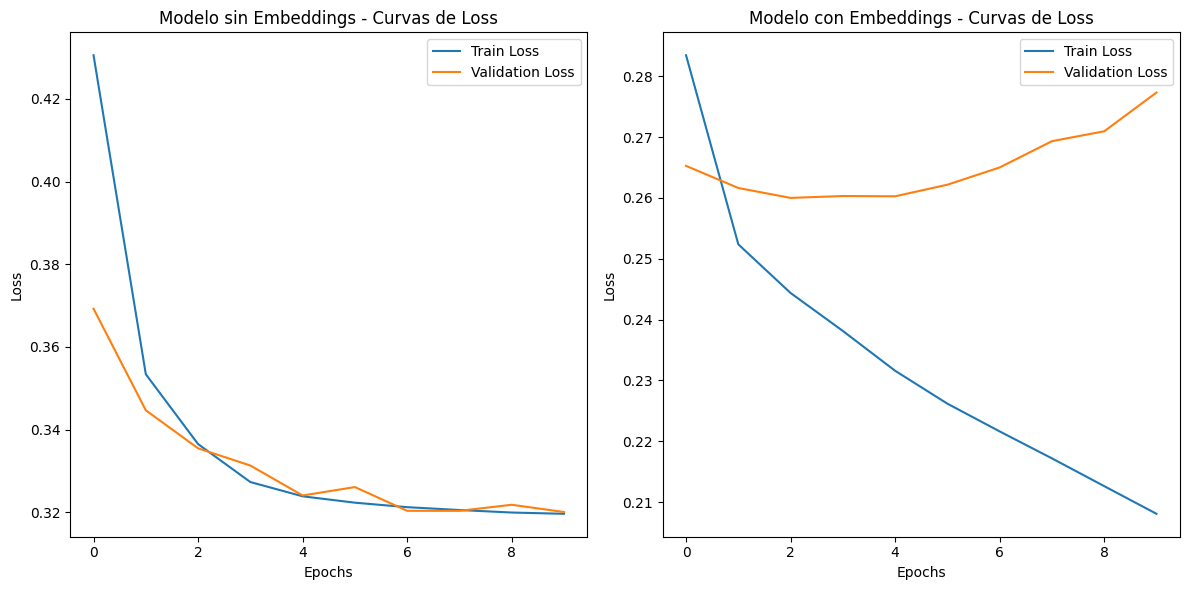

In [89]:
plt.figure(figsize=(12, 6)) 

# Graficar las curvas de loss para el modelo sin embeddings
plt.subplot(1, 2, 1)
plt.plot(history_a.history['loss'], label='Train Loss')
plt.plot(history_a.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Modelo sin Embeddings - Curvas de Loss')
plt.legend()

# Graficar las curvas de loss para el modelo con embeddings
plt.subplot(1, 2, 2)
plt.plot(history_b.history['loss'], label='Train Loss')
plt.plot(history_b.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Modelo con Embeddings - Curvas de Loss')
plt.legend()

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
plt.show()

d) Compare el score de cada modelo.

In [90]:
# Calcular las predicciones de ambos modelos en el conjunto de prueba
predictions_a = model_a.predict(X_test)
predictions_b = model_b.predict([test_user_indices, test_product_indices])

# Convertir las predicciones en etiquetas binarias (0 o 1)
labels_pred_a = (predictions_a > 0.5).astype(int)
labels_pred_b = (predictions_b > 0.5).astype(int)

# Calcular métricas completas para ambos modelos
report_a = classification_report(y_test, labels_pred_a, target_names=['Clase 0', 'Clase 1'])
report_b = classification_report(y_test, labels_pred_b, target_names=['Clase 0', 'Clase 1'])

# Calcular la matriz de confusión para ambos modelos
conf_matrix_a = confusion_matrix(y_test, labels_pred_a)
conf_matrix_b = confusion_matrix(y_test, labels_pred_b)

# Imprimir los resultados
print("Resultados del Modelo sin Embeddings:")
print(report_a)
print("Matriz de Confusión:")
print(conf_matrix_a)

print("\nResultados del Modelo con Embeddings:")
print(report_b)
print("Matriz de Confusión:")
print(conf_matrix_b)

ValueError: in user code:

    File "c:\Users\karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2283, in predict_step
        return self(x, training=False)
    File "c:\Users\karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_12" is incompatible with the layer: expected shape=(None, 12), found shape=(None, 14)
